# **Praktikum Kecerdasan Buatan - Post Test 8 - Deep Learning**
###### Tjeng, Ivan Cahyadi 2009106146

## **Import Libraries**

In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

## **Load Data**

In [3]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tfds.fashion_mnist.load_data()

In [4]:
# Cek jumlah data train dan test
print(f'panjang x train: {len(x_train_raw)}',
      f'panjang y train: {len(y_train_raw)}',
      f'panjang x test: {len(x_test_raw)}',
      f'panjang y test: {len(y_test_raw)}',
      sep='\n')

panjang x train: 60000
panjang y train: 60000
panjang x test: 10000
panjang y test: 10000


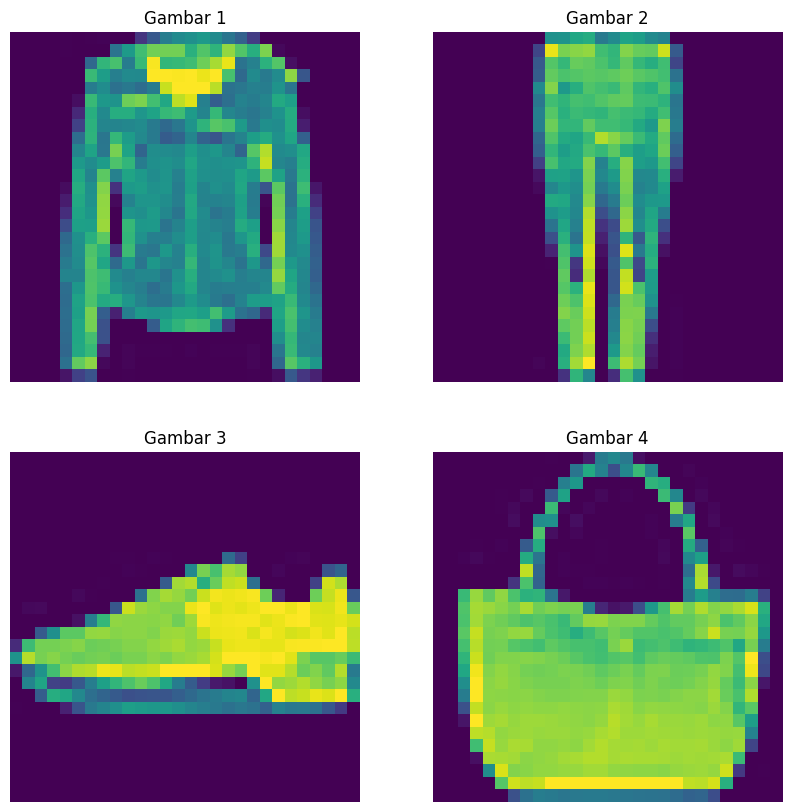

In [7]:
# Menampilkan sampel gambar
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 2, 1)

plt.imshow(x_train_raw[38174])
plt.axis('off')
plt.title("Gambar 1")

fig.add_subplot(2, 2, 2)

plt.imshow(x_train_raw[8162])
plt.axis('off')
plt.title("Gambar 2")

fig.add_subplot(2, 2, 3)

plt.imshow(x_train_raw[41721])
plt.axis('off')
plt.title("Gambar 3")

fig.add_subplot(2, 2, 4)

plt.imshow(x_train_raw[100])
plt.axis('off')
plt.title("Gambar 4")

plt.show()

In [8]:
# Encode label
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)

In [9]:
# Cek dimensi data train
x_train_raw.shape

(60000, 28, 28)

In [10]:
# Ubah dimensi array image menjadi 1D
x_train = tf.reshape(x_train_raw, [60000, 784])
x_test = tf.reshape(x_test_raw, [10000, 784])

In [11]:
# Menormalkan nilai piksel gambar
x_train = tf.cast(x_train, tf.float32) / 255
x_test = tf.cast(x_test, tf.float32) / 255

## **Modeling**

In [130]:
# Bangun arsitektur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=784),
    tf.keras.layers.Dense(32, activation='selu'),
    tf.keras.layers.Dense(num_class, activation='exponential')
])

In [131]:
# Ringkasan detail parameter layer
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 32)                25120     
                                                                 
 dense_89 (Dense)            (None, 32)                1056      
                                                                 
 dense_90 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Konfigurasi model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [133]:
# Latih model
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    steps_per_epoch=5,
    validation_data=(x_test, y_test)
)

Epoch 1/20
5/5 [==============================] - 1s 125ms/step - loss: 2.1227 - accuracy: 0.2613 - val_loss: 1.8552 - val_accuracy: 0.3941
Epoch 2/20
5/5 [==============================] - 0s 97ms/step - loss: 1.7105 - accuracy: 0.4814 - val_loss: 1.5219 - val_accuracy: 0.5565
Epoch 3/20
5/5 [==============================] - 0s 117ms/step - loss: 1.4215 - accuracy: 0.5824 - val_loss: 1.2900 - val_accuracy: 0.6088
Epoch 4/20
5/5 [==============================] - 0s 120ms/step - loss: 1.2093 - accuracy: 0.6236 - val_loss: 1.1115 - val_accuracy: 0.6421
Epoch 5/20
5/5 [==============================] - 0s 98ms/step - loss: 1.0479 - accuracy: 0.6593 - val_loss: 0.9802 - val_accuracy: 0.6795
Epoch 6/20
5/5 [==============================] - 0s 113ms/step - loss: 0.9293 - accuracy: 0.6955 - val_loss: 0.8859 - val_accuracy: 0.7024
Epoch 7/20
5/5 [==============================] - 0s 107ms/step - loss: 0.8431 - accuracy: 0.7211 - val_loss: 0.8163 - val_accuracy: 0.7248
Epoch 8/20
5/5 [======

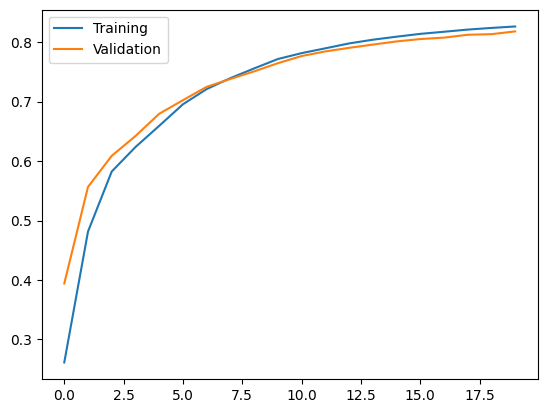

In [134]:
# Grafik learning rate
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()